In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


ticker_symbol = "BTC-USD"

start_date = "2023-01-01"
end_date = "2023-12-31"


data = yf.download(ticker_symbol, start=start_date, end=end_date)
print(data.columns)

data.dropna(inplace=True)

selected_features = ['Open', 'High', 'Low', 'Close', 'Volume']
data = data[selected_features]

scaler = MinMaxScaler()
data[selected_features] = scaler.fit_transform(data[selected_features])

z_scores = stats.zscore(data[selected_features])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]

print(data.head())

[*********************100%***********************]  1 of 1 completed


MultiIndex([('Adj Close', 'BTC-USD'),
            (    'Close', 'BTC-USD'),
            (     'High', 'BTC-USD'),
            (      'Low', 'BTC-USD'),
            (     'Open', 'BTC-USD'),
            (   'Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])
Price                          Open      High       Low     Close    Volume
Ticker                      BTC-USD   BTC-USD   BTC-USD   BTC-USD   BTC-USD
Date                                                                       
2023-01-01 00:00:00+00:00  0.000000  0.000000  0.000000  0.000000  0.079389
2023-01-02 00:00:00+00:00  0.002808  0.004591  0.001881  0.002302  0.137279
2023-01-03 00:00:00+00:00  0.005100  0.004631  0.003731  0.001989  0.173904
2023-01-04 00:00:00+00:00  0.004788  0.011902  0.005406  0.008647  0.265577
2023-01-05 00:00:00+00:00  0.011420  0.009032  0.009926  0.007685  0.169637


In [ ]:
import yfinance as yf

# Defining the ticker symbol for the cryptocurrency
ticker_symbol = "BTC-USD"  # For example, Bitcoin (BTC-USD)

# Setting the start and end dates for the data
start_date = "2022-01-01"
end_date = "2022-12-31"


data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Displaying the first few rows of the downloaded data
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price                         Adj Close         Close          High  \
Ticker                          BTC-USD       BTC-USD       BTC-USD   
Date                                                                  
2022-01-01 00:00:00+00:00  47686.812500  47686.812500  47827.312500   
2022-01-02 00:00:00+00:00  47345.218750  47345.218750  47881.406250   
2022-01-03 00:00:00+00:00  46458.117188  46458.117188  47510.726562   
2022-01-04 00:00:00+00:00  45897.574219  45897.574219  47406.546875   
2022-01-05 00:00:00+00:00  43569.003906  43569.003906  46929.046875   

Price                               Low          Open       Volume  
Ticker                          BTC-USD       BTC-USD      BTC-USD  
Date                                                                
2022-01-01 00:00:00+00:00  46288.484375  46311.746094  24582667004  
2022-01-02 00:00:00+00:00  46856.937500  47680.925781  27951569547  
2022-01-03 00:00:00+00:00  45835.964844  47343.542969  33071628362  
2022-01-04 00:00:

Data Preprocessing

STEP1: Handling missing values

In [ ]:
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

data.dropna(inplace=True)

data.fillna(method='ffill', inplace=True)

Missing values:
 Price      Ticker 
Adj Close  BTC-USD    0
Close      BTC-USD    0
High       BTC-USD    0
Low        BTC-USD    0
Open       BTC-USD    0
Volume     BTC-USD    0
dtype: int64


<ipython-input-4-6689819eecfc>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


STEP2: Feature selection

In [ ]:
selected_features = ['Open', 'High', 'Low', 'Close', 'Volume']
data = data[selected_features]

STEP3: Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[selected_features] = scaler.fit_transform(data[selected_features])

Removing Outliers

In [ ]:
from scipy import stats

z_scores = stats.zscore(data[selected_features])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]

Data Visualization

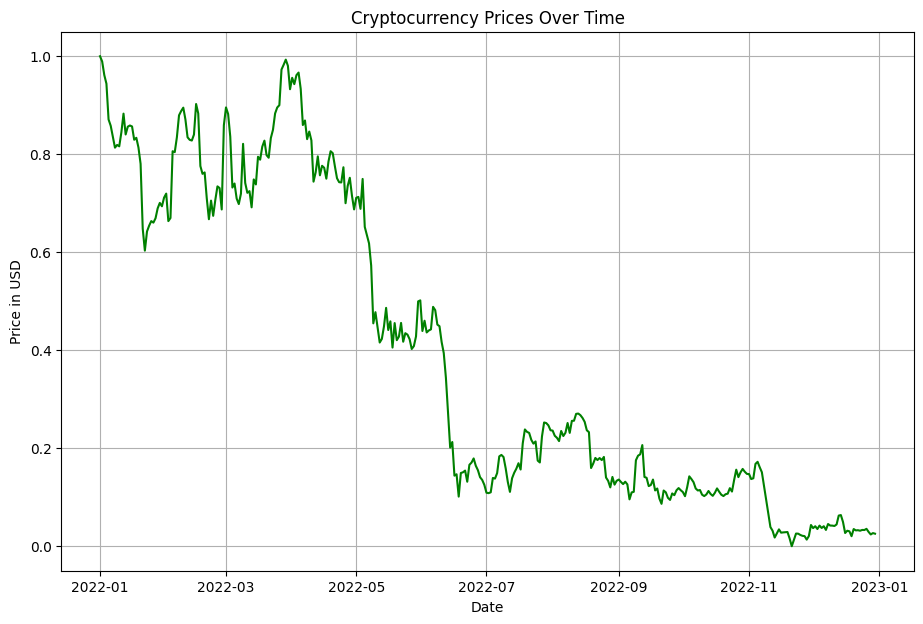

In [ ]:
# Time Series Plot
plt.figure(figsize=(11, 7))
plt.plot(data.index, data['Close'], color='green')
plt.title('Cryptocurrency Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.grid(True)
plt.show()

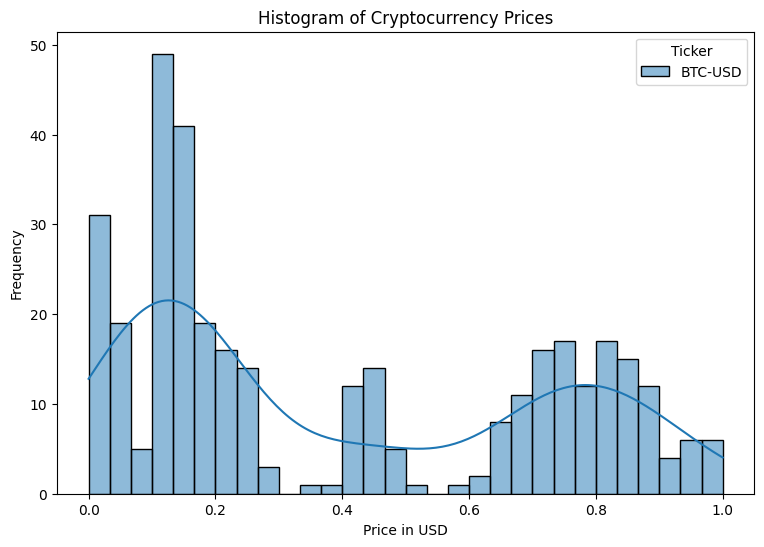

In [ ]:
# Histogram
plt.figure(figsize=(9, 6))
sns.histplot(data['Close'], bins=30, kde=True, color='blue')
plt.title('Histogram of Cryptocurrency Prices')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.show()

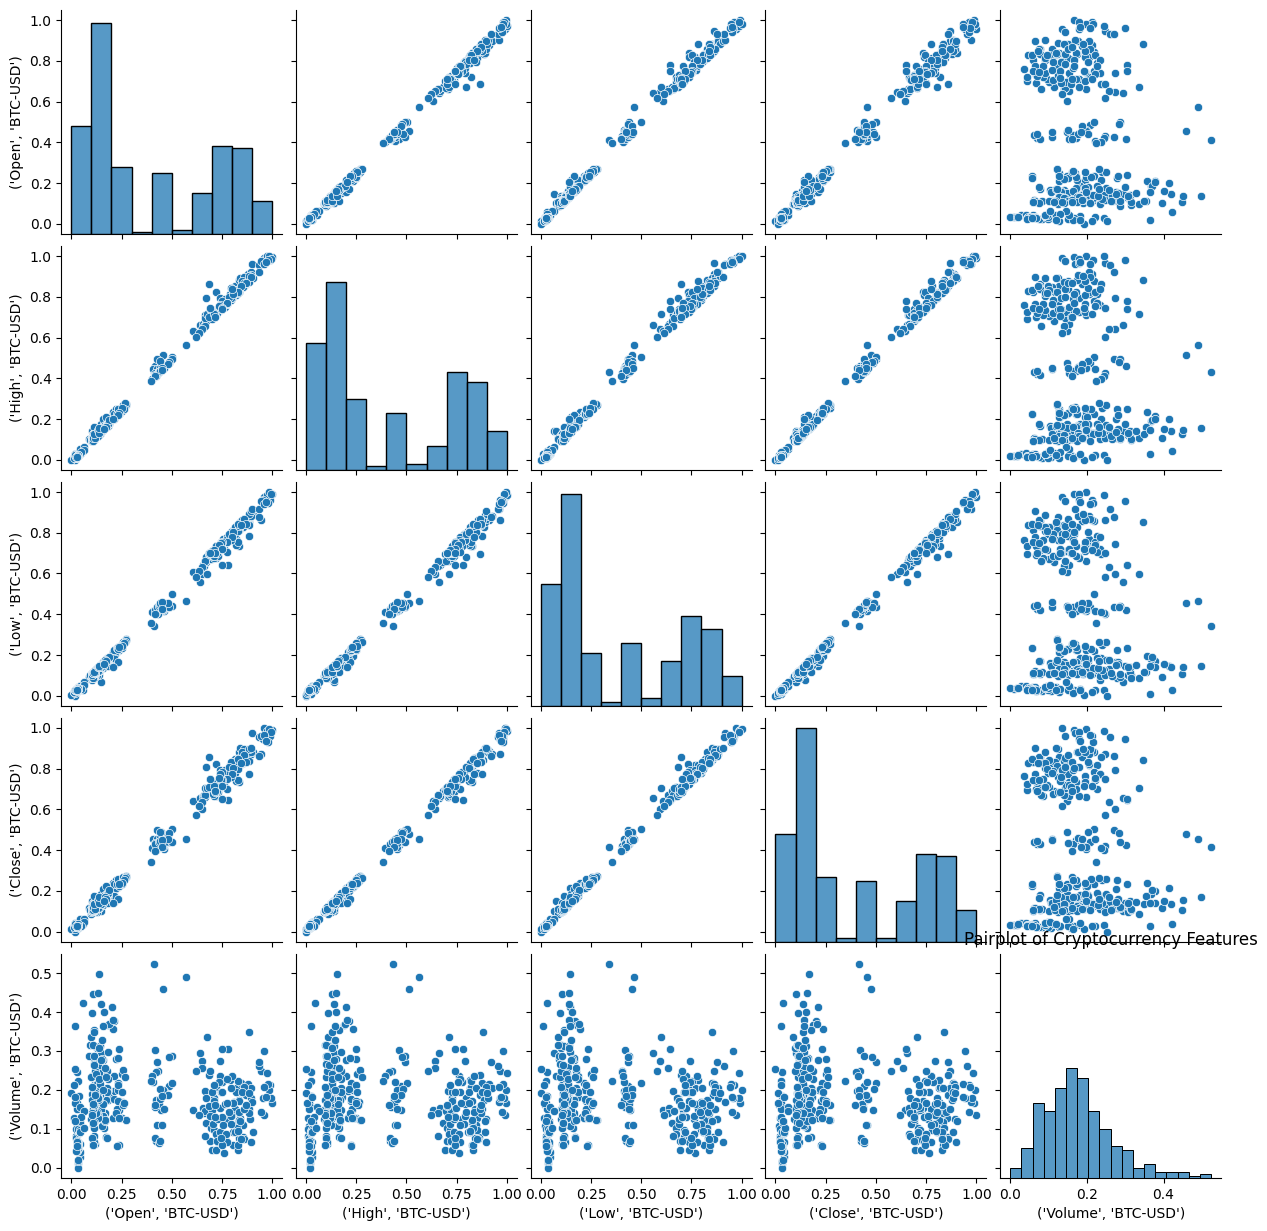

In [ ]:
# Pairplot
sns.pairplot(data[selected_features])
plt.title('Pairplot of Cryptocurrency Features')
plt.show()

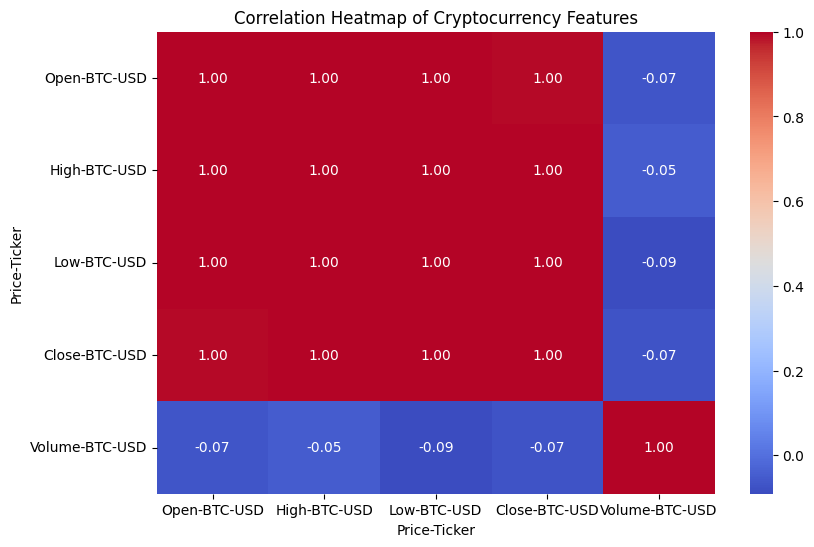

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(9, 6))
sns.heatmap(data[selected_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Cryptocurrency Features')
plt.show()

Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Close'])  # Features (excluding the 'Close' column)
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shapes:", X_train.shape, y_train.shape)
print("Testing set shapes:", X_test.shape, y_test.shape)

Training set shapes: (286, 4) (286, 1)
Testing set shapes: (72, 4) (72, 1)


<ipython-input-13-141d510b7018>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = data.drop(columns=['Close'])  # Features (excluding the 'Close' column)


RNN Model:

In [ ]:
# Step 1: Data Preparation
def load_data(symbol, start_date, end_date):
    # Downloading data from Yahoo Finance
    df = yf.download(symbol, start=start_date, end=end_date)
    return df

def preprocess_data(df):
    # Extracting the 'Close' prices
    prices = df['Close'].values.reshape(-1, 1)

    # Normalizing the data using Min-Max scaling
    scaler = MinMaxScaler(feature_range=(0, 1))
    prices_scaled = scaler.fit_transform(prices)

    return prices_scaled, scaler

In [ ]:
# Step 2: Model Architecture
def build_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(units=50, input_shape=input_shape, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
# Step 3: Training
def train_model(model, X_train, y_train, epochs=100, batch_size=32):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    return history

In [ ]:
# Step 4: Evaluation
def evaluate_model(model, X_test, y_test, scaler):
    # Making predictions
    predictions = model.predict(X_test)

    # Inverse transforming the predictions and actual values
    predictions = scaler.inverse_transform(predictions)
    actual_values = scaler.inverse_transform(y_test)

    # Calculating RMSE
    rmse = np.sqrt(mean_squared_error(actual_values, predictions))
    print("Root Mean Squared Error:", rmse)

    # Plotting the actual vs. predicted prices
    plt.figure(figsize=(12, 6))
    plt.plot(actual_values, label="Actual Prices")
    plt.plot(predictions, label="Predicted Prices")
    plt.title("Cryptocurrency Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

In [ ]:
# Step 5: Prediction
def predict_future_prices(model, last_n_prices, future_steps, scaler):
    future_prices = []
    for _ in range(future_steps):
        # Predicting the next price
        next_price = model.predict(last_n_prices.reshape(1, -1, 1))
        future_prices.append(next_price[0, 0])

        # Updating the input sequence with the new price
        last_n_prices = np.append(last_n_prices[1:], next_price[0])
    future_prices = scaler.inverse_transform(np.array(future_prices).reshape(-1, 1))
    return future_prices

# Main function
if __name__ == "__main__":
    # Step 1: Data Preparation
    start_date = '2020-01-01'
    end_date = '2022-01-01'
    symbol = 'BTC-USD'
    df = load_data(symbol, start_date, end_date)
    prices_scaled, scaler = preprocess_data(df)

    # Splitting data into train and test sets
    train_size = int(len(prices_scaled) * 0.8)
    train_data, test_data = prices_scaled[:train_size], prices_scaled[train_size:]

    # Converting data into sequences
    def create_sequences(data, seq_length):
        X, y = [], []
        for i in range(len(data) - seq_length):
            X.append(data[i:i+seq_length])
            y.append(data[i+seq_length])
        return np.array(X), np.array(y)

    seq_length = 10
    X_train, y_train = create_sequences(train_data, seq_length)
    X_test, y_test = create_sequences(test_data, seq_length)

[*********************100%***********************]  1 of 1 completed


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1224
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0097
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0041
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.8031e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.7249e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.3386e-04
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.4773e-04
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.7691e-04
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.9031e-04
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.7867e-04
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.8332e-04
Epoch 13/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.0945e-04
Epoch 14/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8942e-04
Epoch 15/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 

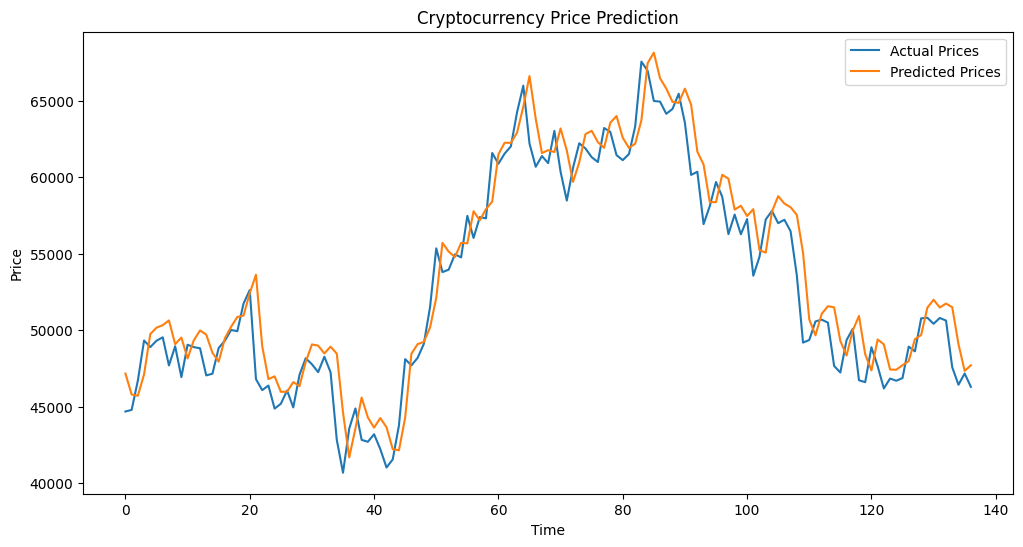

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

In [ ]:
# Step 2: Model Architecture
input_shape = (X_train.shape[1], 1)  # (timesteps, features)
model = build_rnn_model(input_shape)

# Step 3: Training
history = train_model(model, X_train, y_train)

# Step 4: Evaluation
evaluate_model(model, X_test, y_test, scaler)

# Step 5: Prediction
last_n_prices = X_test[-1]
future_steps = 30
future_prices = predict_future_prices(model, last_n_prices, future_steps, scaler)
print("Predicted future prices:", future_prices)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 4: Evaluation
def evaluate_model(model, X_test, y_test, scaler):
    # Making predictions
    y_pred = model.predict(X_test)

    # Inverse transforming to get actual prices
    y_pred_actual = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    # Calculating evaluation metrics
    mae = mean_absolute_error(y_test_actual, y_pred_actual)
    mse = mean_squared_error(y_test_actual, y_pred_actual)
    rmse = np.sqrt(mse)

    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)

# Calling the evaluate_model function
evaluate_model(model, X_test, y_test, scaler)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Absolute Error: 1603.4425752737227
Mean Squared Error: 4273707.971130594
Root Mean Squared Error: 2067.2948437827135


In [ ]:
# Step 4: Evaluation
def evaluate_model(model, X_test, y_test, scaler):
    # Making predictions
    y_pred = model.predict(X_test)

    # Inverse transforming to get actual prices
    y_pred_actual = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    # Calculating percentage accuracy
    accuracy = 100 * (1 - np.mean(np.abs((y_test_actual - y_pred_actual) / y_test_actual)))

    print("Accuracy:", accuracy, "%")

# Calling the evaluate_model function
evaluate_model(model, X_test, y_test, scaler)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Accuracy: 96.88510741088741 %


Long Short Term Memory (LSTM) model:

In [ ]:
# Step 1: Model Architecture
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, input_shape=input_shape, return_sequences=True))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
# Step 2: Training
def train_model(model, X_train, y_train, epochs=100, batch_size=32):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    return history

In [ ]:
# Step 3: Evaluation
def evaluate_model(model, X_test, y_test, scaler):
    # Making predictions
    predictions = model.predict(X_test)

    # Inverse transforming the predictions and actual values
    predictions = scaler.inverse_transform(predictions)
    actual_values = scaler.inverse_transform(y_test)

    # Calculating RMSE
    rmse = np.sqrt(mean_squared_error(actual_values, predictions))
    print("Root Mean Squared Error:", rmse)

    # Plotting the actual vs. predicted prices
    plt.figure(figsize=(12, 6))
    plt.plot(actual_values, label="Actual Prices")
    plt.plot(predictions, label="Predicted Prices")
    plt.title("Cryptocurrency Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

In [ ]:
# Step 5: Prediction
def predict_future_prices(model, last_n_prices, future_steps, scaler):
    future_prices = []
    for _ in range(future_steps):
        # Predicting the next price
        next_price = model.predict(last_n_prices.reshape(1, -1, 1))
        future_prices.append(next_price[0, 0])

        # Updating the input sequence with the new price
        last_n_prices = np.append(last_n_prices[1:], next_price[0])
    future_prices = scaler.inverse_transform(np.array(future_prices).reshape(-1, 1))
    return future_prices

# Main function
if __name__ == "__main__":
    # Step 1: Data Preparation
    start_date = '2020-01-01'
    end_date = '2022-01-01'
    symbol = 'BTC-USD'
    df = load_data(symbol, start_date, end_date)
    prices_scaled, scaler = preprocess_data(df)

    # Splitting data into train and test sets
    train_size = int(len(prices_scaled) * 0.8)
    train_data, test_data = prices_scaled[:train_size], prices_scaled[train_size:]

    # Converting data into sequences
    def create_sequences(data, seq_length):
        X, y = [], []
        for i in range(len(data) - seq_length):
            X.append(data[i:i+seq_length])
            y.append(data[i+seq_length])
        return np.array(X), np.array(y)

    seq_length = 10
    X_train, y_train = create_sequences(train_data, seq_length)
    X_test, y_test = create_sequences(test_data, seq_length)

[*********************100%***********************]  1 of 1 completed


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0795
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0048
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0022
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0018
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0017
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0016
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0017
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0016
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0018
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0015
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0015
Epoch 13/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0016
Epoch 14/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0018
Epoch 15/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0015
E

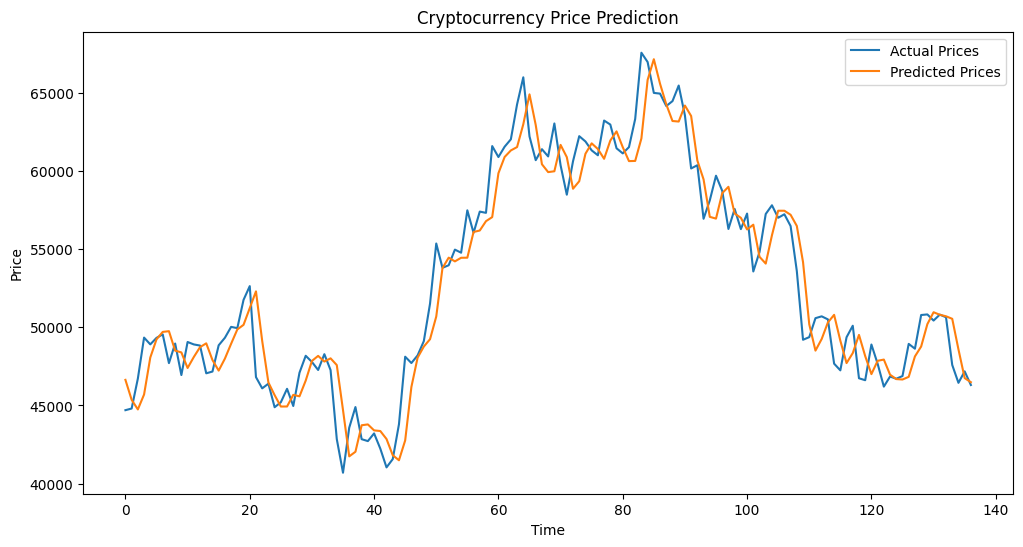

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

In [ ]:
# Step 2: Model Architecture
input_shape = (X_train.shape[1], 1)  # (timesteps, features)
model = build_lstm_model(input_shape)

# Step 3: Training
history = train_model(model, X_train, y_train)

# Step 4: Evaluation
evaluate_model(model, X_test, y_test, scaler)

# Step 5: Prediction
last_n_prices = X_test[-1]
future_steps = 30
future_prices = predict_future_prices(model, last_n_prices, future_steps, scaler)
print("Predicted future prices:", future_prices)

In [ ]:
# Step 4: Evaluation
def evaluate_model(model, X_test, y_test, scaler):
    # Making predictions
    y_pred = model.predict(X_test)

    # Inverse transforming to get actual prices
    y_pred_actual = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    # Calculating Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_test_actual - y_pred_actual) / y_test_actual)) * 100

    # Calculating accuracy
    accuracy = 100 - mape

    print("Accuracy:", accuracy, "%")

# Calling the evaluate_model function
evaluate_model(model, X_test, y_test, scaler)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Accuracy: 97.14235964140468 %


Convolutional Neural Network(CNN) model:

In [ ]:
# Step 1: Model Architecture
def build_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(units=50, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
# Step 2: Training
def train_model(model, X_train, y_train, epochs=100, batch_size=32):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    return history

In [ ]:
# Step 3: Evaluation
def evaluate_model(model, X_test, y_test, scaler):
    # Making predictions
    predictions = model.predict(X_test)

    # Inverse transforming the predictions and actual values
    predictions = scaler.inverse_transform(predictions)
    actual_values = scaler.inverse_transform(y_test)

    # Calculating RMSE
    rmse = np.sqrt(mean_squared_error(actual_values, predictions))
    print("Root Mean Squared Error:", rmse)

    # Plotting the actual vs. predicted prices
    plt.figure(figsize=(12, 6))
    plt.plot(actual_values, label="Actual Prices")
    plt.plot(predictions, label="Predicted Prices")
    plt.title("Cryptocurrency Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

In [ ]:
# Step 5: Prediction
def predict_future_prices(model, last_n_prices, future_steps, scaler):
    future_prices = []
    for _ in range(future_steps):
        # Predicting the next price
        next_price = model.predict(last_n_prices.reshape(1, -1, 1))
        future_prices.append(next_price[0, 0])

        # Updating the input sequence with the new price
        last_n_prices = np.append(last_n_prices[1:], next_price[0])
    future_prices = scaler.inverse_transform(np.array(future_prices).reshape(-1, 1))
    return future_prices

# Main function
if __name__ == "__main__":
    # Step 1: Data Preparation
    start_date = '2020-01-01'
    end_date = '2022-01-01'
    symbol = 'BTC-USD'
    df = load_data(symbol, start_date, end_date)
    prices_scaled, scaler = preprocess_data(df)

    # Splitting data into train and test sets
    train_size = int(len(prices_scaled) * 0.8)
    train_data, test_data = prices_scaled[:train_size], prices_scaled[train_size:]

    # Converting data into sequences
    def create_sequences(data, seq_length):
        X, y = [], []
        for i in range(len(data) - seq_length):
            X.append(data[i:i+seq_length])
            y.append(data[i+seq_length])
        return np.array(X), np.array(y)

    seq_length = 10
    X_train, y_train = create_sequences(train_data, seq_length)
    X_test, y_test = create_sequences(test_data, seq_length)

    # Reshaping data for CNN input
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Step 2: Model Architecture
input_shape = (X_train.shape[1], 1)  # (timesteps, features)
model = build_cnn_model(input_shape)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0799
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0060 
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023 
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019  
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016 
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013
Epoch 13/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013
Epoch 14/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013
Epoch 15/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.001

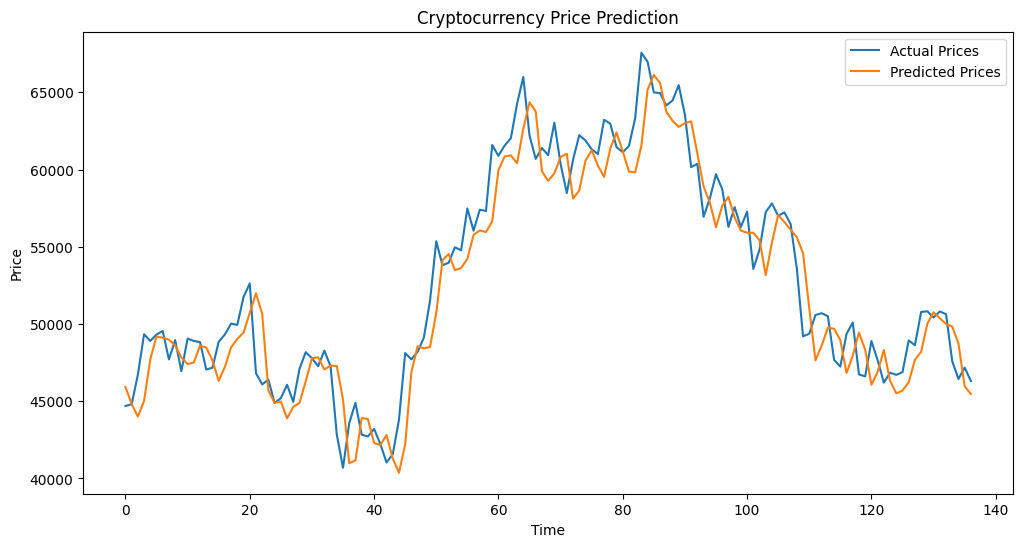

In [ ]:
# Step 3: Training
history = train_model(model, X_train, y_train)

# Step 4: Evaluation
evaluate_model(model, X_test, y_test, scaler)

In [ ]:
# Step 5: Prediction
last_n_prices = X_test[-1]
future_steps = 30
future_prices = predict_future_prices(model, last_n_prices, future_steps, scaler)
print("Predicted future prices:", future_prices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Step 4: Evaluation
def evaluate_model(model, X_test, y_test, scaler):
    # Making predictions
    y_pred = model.predict(X_test)

    # Inverse transforming to get actual prices
    y_pred_actual = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    # Calculating Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_test_actual - y_pred_actual) / y_test_actual)) * 100

    # Calculating accuracy
    accuracy = 100 - mape

    print("Accuracy:", accuracy, "%")

# Calling the evaluate_model function
evaluate_model(model, X_test, y_test, scaler)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy: 96.68666070585677 %
